# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import statsmodels.formula.api as smf
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [13]:
crosstab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)

#Quantidade média de doentes
crosstab['Prob_disease'] = crosstab[1]/crosstab['All']

#Odds
crosstab['Odds'] = crosstab[1]/crosstab[0]

#Odds ratio 
crosstab['Odds_ratio'] = crosstab['Odds']/crosstab.loc['All','Odds']

#Logito
crosstab['Logito'] = np.log(crosstab['Odds'])

#LOG do Odds ratio
crosstab['Log_odds_ratio'] = np.log(crosstab['Odds_ratio'])

crosstab

flag_doente,0,1,All,Prob_disease,Odds,Odds_ratio,Logito,Log_odds_ratio
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [15]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [17]:
df['cat_age'] = pd.qcut(df['age'], 5, 
                        labels=['[29-45] years', '(45-53] years', '(53-58] years', '(58-62] years', '(62-77] years']
                       )

In [41]:
crosstab_age = pd.crosstab(df['cat_age'], df['flag_doente'], margins=True)

#Valor médio da variável age
crosstab_age['Age_mean'] = pd.concat([
                                round(df[['cat_age', 'age']].groupby('cat_age').mean().iloc[:,0]), 
                                pd.Series(
                                    round(df['age'].mean(),2), index=['All']
                                )
                            ])
#Quantidade média de doentes
crosstab_age['Prob_disease'] = crosstab_age[1]/crosstab_age['All']

#Odds
crosstab_age['Odds'] = crosstab_age[1]/crosstab_age[0]

#Odds ratio 
crosstab_age['Odds_ratio'] = crosstab_age['Odds']/crosstab_age.loc['All','Odds']

#Logito
crosstab_age['Logito'] = np.log(crosstab_age['Odds'])

#LOG do Odds ratio
crosstab_age['Log_odds_ratio'] = np.log(crosstab_age['Odds_ratio'])

crosstab_age

flag_doente,0,1,All,Age_mean,Prob_disease,Odds,Odds_ratio,Logito,Log_odds_ratio
cat_age,,,,,,,,,
[29-45] years,47,16,63,41.00,0.253968,0.340426,0.401653,-1.077559,-0.912166
(45-53] years,42,22,64,50.00,0.343750,0.523810,0.618020,-0.646627,-0.481235
(53-58] years,32,39,71,56.00,0.549296,1.218750,1.437950,0.197826,0.363218
(58-62] years,13,32,45,60.00,0.711111,2.461538,2.904261,0.900787,1.066179
(62-77] years,30,30,60,67.00,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,54.44,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

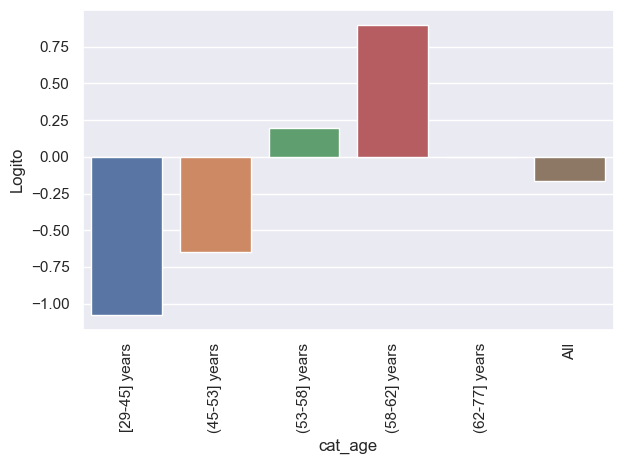

In [54]:
sns.set_theme()
sns.barplot(x=crosstab_age.index, y=crosstab_age.Logito)
plt.xticks(rotation=90)
plt.tight_layout()